# tensorflow2-基础CNN网络
![](https://adeshpande3.github.io/assets/Cover.png)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.0.0-alpha0


## 1.构造数据

In [2]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)


(60000, 28, 28)   (60000,)
(10000, 28, 28)   (10000,)


In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))

## 2.构造网络

In [5]:
model = keras.Sequential()


### 卷积层
![](http://cs231n.github.io/assets/cnn/depthcol.jpeg)

In [6]:
model.add(layers.Conv2D(input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                        filters=32, kernel_size=(3,3), strides=(1,1), padding='valid',
                       activation='relu'))


### 池化层
![](http://cs231n.github.io/assets/cnn/maxpool.jpeg)

In [7]:
model.add(layers.MaxPool2D(pool_size=(2,2)))

### 全连接层

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
# 分类层
model.add(layers.Dense(10, activation='softmax'))

## 3.模型配置

In [9]:
model.compile(optimizer=keras.optimizers.Adam(),
             # loss=keras.losses.CategoricalCrossentropy(),  # 需要使用to_categorical
             loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


## 4.模型训练

In [10]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 8s 145us/sample - loss: 0.7874 - accuracy: 0.8206 - val_loss: 0.2062 - val_accuracy: 0.9505
Epoch 2/5
54000/54000 [==============================] - 8s 142us/sample - loss: 0.1678 - accuracy: 0.9578 - val_loss: 0.1163 - val_accuracy: 0.9730
Epoch 3/5
54000/54000 [==============================] - 7s 138us/sample - loss: 0.1011 - accuracy: 0.9723 - val_loss: 0.1138 - val_accuracy: 0.9740
Epoch 4/5
54000/54000 [==============================] - 8s 140us/sample - loss: 0.0736 - accuracy: 0.9786 - val_loss: 0.0948 - val_accuracy: 0.9772
Epoch 5/5
54000/54000 [==============================] - 8s 139us/sample - loss: 0.0580 - accuracy: 0.9832 - val_loss: 0.0954 - val_accuracy: 0.9790


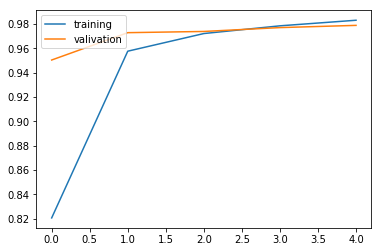

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [12]:
res = model.evaluate(x_test, y_test)


10000/10000 [==============================] - 1s 61us/sample - loss: 0.0966 - accuracy: 0.9748
